# 1 Singular Value Decomposition

## Packages

In [99]:
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

## SVD

In [20]:
X = np.random.rand(5, 3)
U, S, V = np.linalg.svd(X)
Uhat, Shat, Vhat = np.linalg.svd(X, full_matrices=False)
# np.all(np.isclose(X, Uhat @ np.diag(Shat) @ Vhat))
Uhat, Shat, Vhat

(array([[-0.53097862,  0.27628614,  0.1958008 ],
        [-0.33041719,  0.50896983,  0.48861322],
        [-0.59209587,  0.03615505, -0.35288778],
        [-0.42542425, -0.29402184, -0.51184367],
        [-0.27806992, -0.75951277,  0.58000469]]),
 array([2.00539266, 0.6956239 , 0.18960509]),
 array([[-0.56726317, -0.8161552 , -0.1100145 ],
        [-0.74684956,  0.56612138, -0.34888726],
        [-0.34702771,  0.11574661,  0.93068496]]))

## Matrix approximation

> Theorem 
 The optimal rank-r approximation to $X$, in a least-squares sense, is given by the rank-r SVD truncation $\tilde{X}$:
    $$ \tilde{U} \tilde{\Sigma} \tilde{V}^{*} = argmin_{rank(\tilde{X}) = r} \lVert X - \tilde{X} \rVert_{F} $$

In [21]:
X

array([[0.44761223, 0.98215953, 0.08464415],
       [0.07930463, 0.75195702, 0.03559527],
       [0.6779955 , 0.97558381, 0.05958341],
       [0.67038692, 0.5692758 , 0.07489423],
       [0.67275194, 0.16874727, 0.34802699]])

$$ \tilde{X}  = \sum_{k=1}^{r} \sigma_k u_k v_k^*$$

In [22]:
def truncation(X, r):
    X_til = np.zeros_like(X)
    U, S, V = np.linalg.svd(X, full_matrices=False)

    assert r <= len(S), 'r must be least or equal than rank of X'

    return U[:, :r] @ np.diag(S[:r]) @ V[:r, :]

In [23]:
truncation(X, 1)

array([[0.60403352, 0.86905888, 0.11714571],
       [0.37587777, 0.54079767, 0.07289739],
       [0.67355961, 0.96909021, 0.13062954],
       [0.48395641, 0.69629682, 0.09385807],
       [0.31632827, 0.45512027, 0.06134842]])

## Image compression

In [24]:
apolo = cv2.imread('../data/apolo1.png', 0)
apolo.shape

(1031, 640)

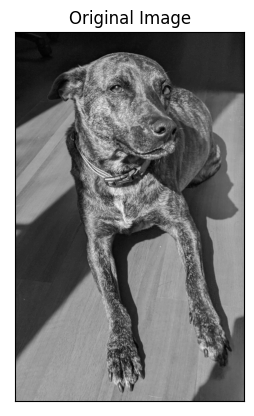

In [25]:
plt.imshow(apolo, cmap='gray')
plt.title("Original Image")
plt.xticks([])
plt.yticks([])
plt.show()

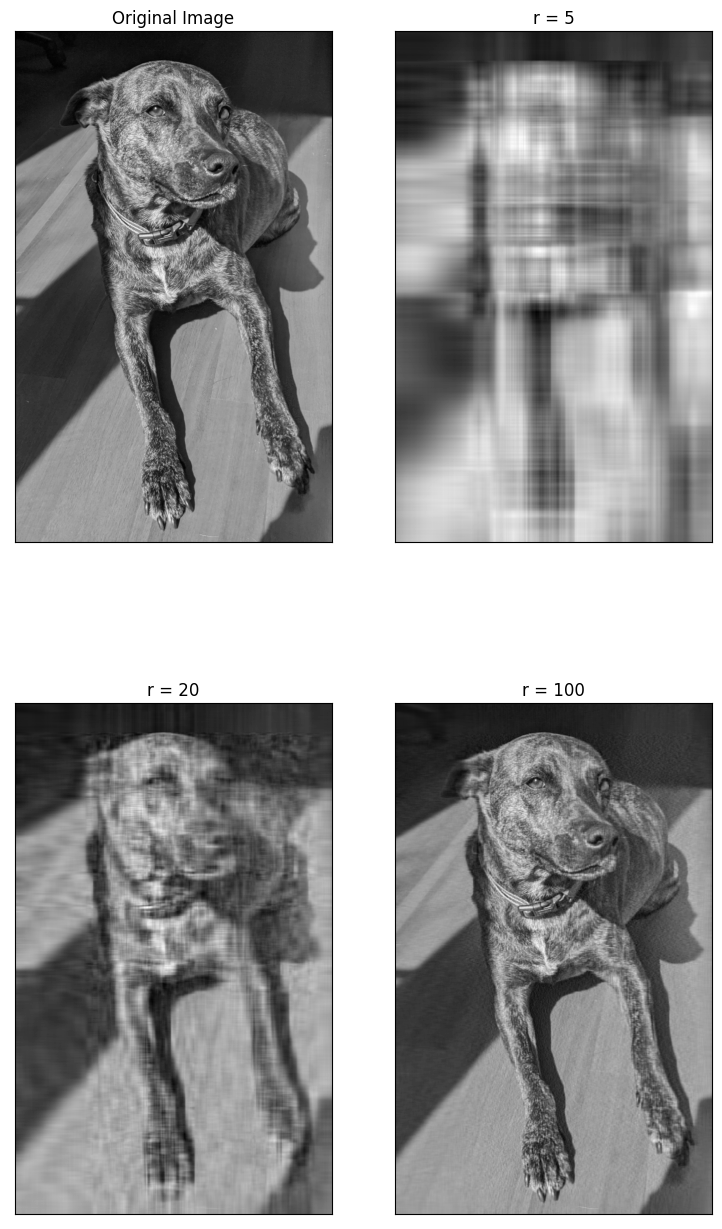

In [26]:
fig, axs = plt.subplots(2, 2,figsize = (9, 16)) # figsize = (9, 16)

axs[0, 0].imshow(apolo, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(truncation(apolo, 5), cmap='gray')
axs[0, 1].set_title("r = 5")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 0].imshow(truncation(apolo, 20), cmap='gray')
axs[1, 0].set_title("r = 20")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(truncation(apolo, 100), cmap='gray')
axs[1, 1].set_title("r = 100")
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.show()

In [27]:
U_apolo, S_apolo, V_apolo = np.linalg.svd(apolo, full_matrices=False)

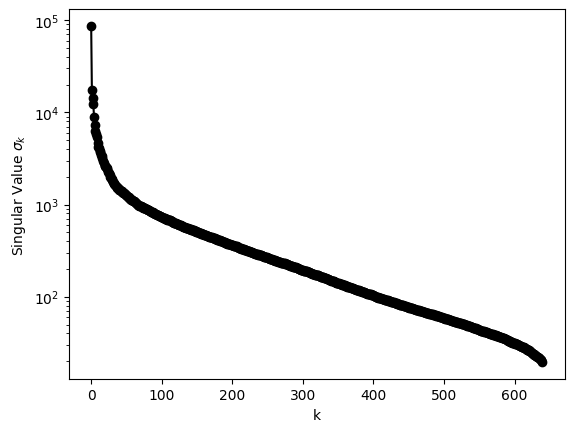

In [28]:
plt.semilogy(S_apolo, 'ko-')
plt.xlabel("k") 
plt.ylabel(r"Singular Value $\sigma_k$")
plt.show()

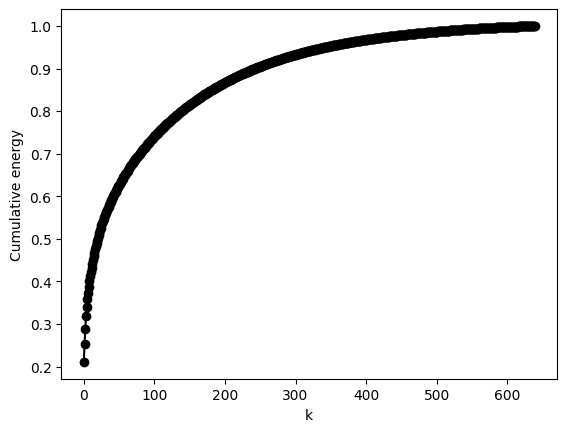

In [29]:
plt.plot(np.cumsum(S_apolo)/np.sum(S_apolo), 'ko-')
plt.xlabel('k') 
plt.ylabel('Cumulative energy')
plt.show()

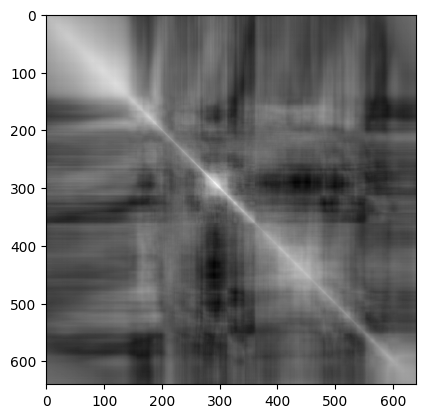

In [30]:
plt.imshow(np.cov(apolo.T), cmap='gray')

In [31]:
# plt.semilogy(np.real(np.linalg.eigvals(np.cov(apolo.T))), 'ko')

## Principal component analysis (PCA)

###  Noisy Gaussian data

In [32]:
x_center = np.array([4, 3])
sig = np.array([1, 0.3])
th = np.pi / 6
R = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])

n = 10_000

X = R @ np.diag(sig) @ np.random.randn(2, n) + np.diag(x_center) @ np.ones((2, n))

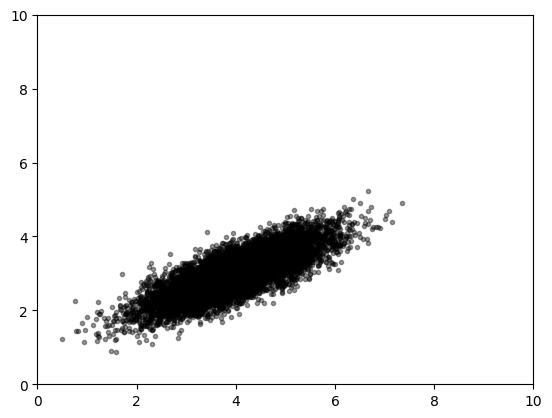

In [33]:
plt.plot(X[0,:], X[1,:], 'k.', alpha=0.4)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

In [109]:
def pca(X):
    n = X.shape[1]
    Xavg = np.mean(X, axis=1)
    
    B = X - np.outer(Xavg, np.ones(n))
    
    U, S, V = np.linalg.svd(B/np.sqrt(n), full_matrices=False)
        
    return Xavg, U, S, V

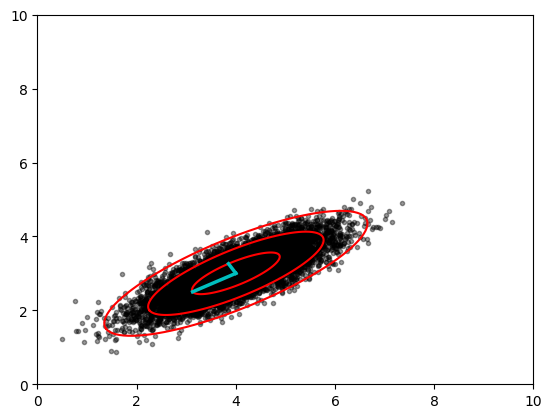

In [110]:
Xavg, dirs, std, V = pca(X)
ang = np.linspace(0, 2 * np.pi, 100)
Xstd = dirs * std @ np.stack([np.cos(ang), np.sin(ang)])

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.plot(X[0, :], X[1, :], 'k.', alpha=0.4)
plt.plot(Xavg[0] + Xstd[0], Xavg[1] + Xstd[1], 'r-')
plt.plot(Xavg[0] + 2 * Xstd[0], Xavg[1] + 2 * Xstd[1], 'r-')
plt.plot(Xavg[0] + 3 * Xstd[0], Xavg[1] + 3 * Xstd[1], 'r-')
plt.plot([Xavg[0], Xavg[0] + std[0] * dirs[0, 0]],
         [Xavg[1], Xavg[1] + std[0] * dirs[0, 1]],
         'c-',
         linewidth=2.5)
plt.plot([Xavg[0], Xavg[0] + std[1] * dirs[1, 0]],
         [Xavg[1], Xavg[1] + std[1] * dirs[1, 1]],
         'c-',
         linewidth=2.5)
plt.show()

In [124]:
V @ X.T

array([[-87.19871311, -50.03628496],
       [-14.88077459,  25.93286842]])

###  Ovarian cancer data

In [74]:
obs = scipy.io.loadmat('../data/obs.mat')['obs']

In [75]:
obs.shape

(216, 4000)

In [76]:
grp = scipy.io.loadmat('../data/grp.mat')['grp'][:,0]

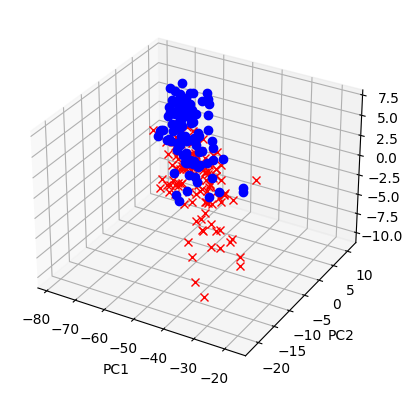

In [107]:
def ovariancancer(obs, grp):
    U, S, V = np.linalg.svd(obs, full_matrices=False)
    plt.subplot(projection='3d')
    for i, ob in enumerate(obs):
        x = np.dot(V[0], ob)
        y = np.dot(V[1], ob)
        z = np.dot(V[2], ob)

        if grp[i][0] == 'Cancer':
            plt.plot(x, y, z, 'rx')
        else:
            plt.plot(x, y, z, 'bo')
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

    return


ovariancancer(obs, grp)

In [89]:
grp[0][0]

'Cancer'

In [103]:
c_fi = plt.figure()
c_ax = Axes3D(c_fi)
c_ax.scatter(1, 2, 3)
plt.show()

<Figure size 640x480 with 0 Axes>